In [1]:
from detdata.dgen import DetGen
import mxnet as mx
from detdata.augmenters import crazy_augmenter, dummy
from imgaug.augmenters import Scale
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# g =mx.image.ImageDetIter(batch_size=32, data_shape=(3,800,800),path_imgrec='/Users/jcieslik/malaria_data/dataset_train.mxrecords')

b = next(g)
b.label[0].shape

/Users/jcieslik/anaconda/lib/python3.5/site-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


(32, 27, 5)

In [24]:
# index files
# python cli.py \
# --action parse_coco_like \
# --coco-labels-dir ../../AiScope/malaria_dataset \
# --out-path /Users/jcieslik/malaria_data

In [5]:
g = DetGen(
    '/home/i008/malaria_data/dataset_train.mxrecords', 
    '/home/i008/malaria_data/dataset_train.csv',
    '/home/i008/malaria_data/dataset_train.mxindex',
    batch_size=8
)

/Users/jcieslik/anaconda/lib/python3.5/site-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))
/Users/jcieslik/anaconda/lib/python3.5/site-packages/mxnet/recordio.py:412: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(s, dtype=np.uint8)


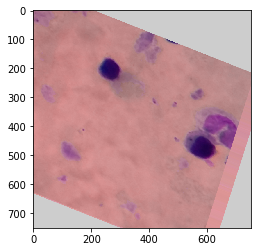

In [44]:
# change target size of the images.
seq = iaa.Sequential([])
# seq.add(iaa.Scale({"height":64, "width":64}))
seq.add(iaa.Scale(1290))
ret = g.get_retina_comp_generator(augmenter=crazy_augmenter)
images,labels = next(ret)
plt.imshow(images[0])

In [24]:
raw_generator = g.get_raw_generator()
list_images, list_bboxes = next(raw_generator)
# list_images[0].shape
print('class_id--xmin--ymin--xmax--ymax')
print(list_bboxes[0])


class_id--xmin--ymin--xmax--ymax
[[   0.  190.  502.  230.  542.]
 [   0.   16.  261.   56.  301.]
 [   0.  221.  475.  261.  515.]
 [   0.  111.  619.  151.  659.]]


{'Malaria': 0}